/Users/paullucaci/Desktop/P20
/Users/paullucaci/Desktop/P20/BaselineMethod


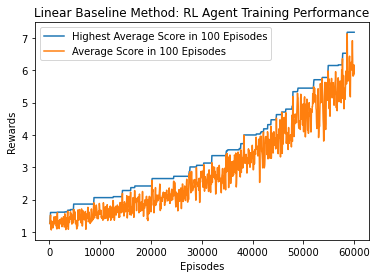

,episode,frame,highest_score,rolling_reward
59550,59550,14930747,7.18,6.01
59600,59600,14951578,7.18,6.56
59650,59650,14970402,7.18,6.92
59700,59700,14988906,7.18,6.32
59750,59750,15006284,7.18,5.85
59800,59800,15023807,7.18,5.82
59850,59850,15041939,7.18,5.88
59900,59900,15059404,7.18,5.85
59950,59950,15077927,7.18,6.17
60000,60000,15095495,7.18,5.92


In [8]:
from google.colab import drive
drive.mount('/content/drive/')

import matplotlib.pyplot as plt
import pandas as pd

%cd /content/drive/MyDrive/P20/
from notebook_plotter import training_plots

%cd /content/drive/MyDrive/P20/BaselineMethod/
metrics_filename='./metrics/keras-linear-baseline-method-metrics_breakout.pkl'

training_plots(metrics_filename=metrics_filename, title="Linear Baseline Method: RL Agent Training Performance").tail(10)

In [2]:
!pip install baselines --no-deps --user

from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/P20/BaselineMethod/

import sys, os
!python -m atari_py.import_roms "./Atari-Roms"

You should consider upgrading via the '/Users/paullucaci/miniforge3/envs/dev/bin/python3.9 -m pip install --upgrade pip' command.
copying adventure.bin from ROMS/Adventure (1980) (Atari, Warren Robinett) (CX2613, CX2613P) (PAL).bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/adventure.bin
copying air_raid.bin from ROMS/Air Raid (Men-A-Vision) (PAL) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/air_raid.bin
copying alien.bin from ROMS/Alien (1982) (20th Century Fox Video Games, Douglas 'Dallas North' Neubauer) (11006) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/alien.bin
copying amidar.bin from ROMS/Amidar (1982) (Parker Brothers, Ed Temple) (PB5310) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/amidar.bin
copying assault.bin from ROMS/Assault (AKA Sky Alien) (1983) (Bomb - Onbase) (CA281).bin to

copying king_kong.bin from ROMS/King Kong (1982) (Tigervision - Software Electronics Corporation, Karl T. Olinger - Teldec) (7-001 - 3.60001 VE) (PAL).bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/king_kong.bin
copying koolaid.bin from ROMS/Kool-Aid Man (Kool Aid Pitcher Man) (1983) (M Network, Stephen Tatsumi, Jane Terjung - Kool Aid) (MT4648) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/koolaid.bin
copying krull.bin from ROMS/Krull (1983) (Atari, Jerome Domurat, Dave Staugas) (CX2682) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/krull.bin
copying kung_fu_master.bin from ROMS/Kung-Fu Master (1987) (Activision - Imagineering, Dan Kitchen, Garry Kitchen) (AG-039-04) ~.bin to /Users/paullucaci/miniforge3/envs/dev/lib/python3.9/site-packages/atari_py/atari_roms/kung_fu_master.bin
copying laser_gates.bin from ROMS/Laser Gates (AKA Innerspace) (1

Streaming output truncated to the last 5000 lines.
55018/60000 done 	Episode Score: 5.0		Avg Score 100 Episodes: 5.840000	Highest Avg Score: 6.150000		Frame count: 13343912
55019/60000 done 	Episode Score: 0.0		Avg Score 100 Episodes: 5.790000	Highest Avg Score: 6.150000		Frame count: 13344051
55020/60000 done 	Episode Score: 4.0		Avg Score 100 Episodes: 5.770000	Highest Avg Score: 6.150000		Frame count: 13344308
55021/60000 done 	Episode Score: 3.0		Avg Score 100 Episodes: 5.790000	Highest Avg Score: 6.150000		Frame count: 13344549
55022/60000 done 	Episode Score: 7.0		Avg Score 100 Episodes: 5.800000	Highest Avg Score: 6.150000		Frame count: 13344916
55023/60000 done 	Episode Score: 5.0		Avg Score 100 Episodes: 5.800000	Highest Avg Score: 6.150000		Frame count: 13345214
55024/60000 done 	Episode Score: 4.0		Avg Score 100 Episodes: 5.800000	Highest Avg Score: 6.150000		Frame count: 13345573
55025/60000 done 	Episode Score: 5.0		Avg Score 100 Episodes: 5.790000	Highest Avg Score: 6.150

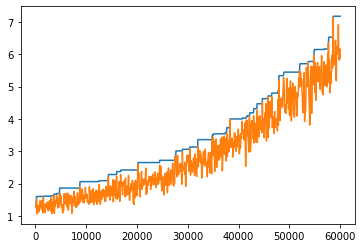

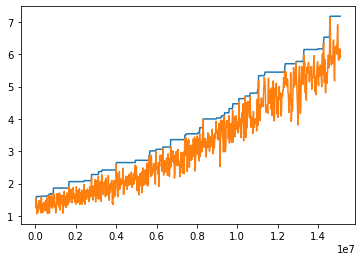

In [ ]:
import tensorflow as tf

%cd /content/drive/MyDrive/P20/BaselineMethod/

from p20 import training_p20
from baselines.common.atari_wrappers import make_atari, wrap_deepmind

### Function adapted from https://keras.io/examples/rl/deep_q_network_breakout/
def q_model(num_actions=4):
    # Network defined by the Deepmind paper (Mnih, et al., 2015)
    inputs = tf.keras.layers.Input(shape=(84, 84, 4,))

    # Convolutions on the frames on the screen
    layer1 = tf.keras.layers.Conv2D(32, 8, strides=4, activation="relu", data_format="channels_last", kernel_initializer='he_normal', use_bias=True)(inputs)
    layer2 = tf.keras.layers.Conv2D(64, 4, strides=2, activation="relu", data_format="channels_last", kernel_initializer='he_normal', use_bias=True)(layer1)
    layer3 = tf.keras.layers.Conv2D(64, 3, strides=1, activation="linear", data_format="channels_last", kernel_initializer='he_normal', use_bias=True)(layer2)

    layer4 = tf.keras.layers.Flatten()(layer3)

    layer5 = tf.keras.layers.Dense(units=512, activation="relu", kernel_initializer='he_normal')(layer4)

    action = tf.keras.layers.Dense(num_actions, activation="linear", kernel_initializer='he_normal')(layer5)

    return tf.keras.Model(inputs=inputs, outputs=action)

def main(game_name, seed):

    with tf.device('/device:GPU:0'):
        env = wrap_deepmind(make_atari(game_name), episode_life=False, frame_stack=True, scale=True)
        env.seed(seed)

        DQN_model = q_model(num_actions=env.action_space.n)
        DQN_model.load_weights("./keras-dqn-model_breakout.h5")

        p20_model = tf.keras.models.Model(inputs=DQN_model.input, outputs=DQN_model.layers[-3].output) # Ablation of all Dense (i.e., linear) layers

        training_p20(env=env, seed=seed, solved_at=40, p20_model=p20_model,
                     max_episodes=60000, lr=0.00025, gamma=0.99, max_epsilon=1, min_epsilon=0.1, render=False,
                     metrics_filename='./metrics/keras-linear-baseline-method-metrics_breakout.pkl',
                     checkpoint_filename='./checkpoints/keras-linear-baseline-method-checkpoint_breakout.pkl',
                     theta_filename='./theta/keras-linear-baseline-method-theta_breakout.npy')

if __name__ == "__main__":
    main(game_name="BreakoutNoFrameskip-v4", seed=0)

In [ ]:
while True: pass